In [ ]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%pylab inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# logistic regression

#### Logistic regression is one type of classification technique that gives the probabilistic output of dependent categorical value based on given independent data variables.

**problem statement:**
Build a classifier to predict whether the patient has 10-year risk of future coronary heart disease (**CHD**) or not.
<u>
 <li> Download/upload the csv file named as framingham.csv from the website link (https://www.framinghamheartstudy.org/).
  This problem has two classes, 0 and 1. O represents normal patient and 1 represents the patient is having the chances of heart disease. </li> </u>



In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('framingham.csv')
data.shape

(4240, 16)

In [ ]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
data['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [ ]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Data visualization part. Ratio of normal and heart patient 

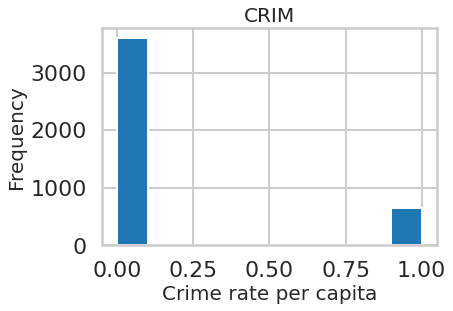

In [ ]:
plt.hist(data.TenYearCHD)
plt.title("CRIM",fontsize=20)
plt.xlabel("Crime rate per capita",fontsize=20)
plt.ylabel("Frequency",fontsize=20)
plt.show()

In [ ]:
data = data.dropna(subset=["cigsPerDay"])
data = data.dropna(subset=["BPMeds"])
data = data.dropna(subset=["totChol"])
data = data.dropna(subset=["BMI"])
data = data.dropna(subset=["heartRate"])

In [ ]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
target=data['TenYearCHD']
print (target)

0       0
1       0
2       0
3       1
4       0
       ..
4234    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4090, dtype: int64


In [ ]:
independent = data.drop(["TenYearCHD"],axis=1)
independent.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


# scaling of features 

In [ ]:
from sklearn.preprocessing import StandardScaler
data3 = independent.copy()
sc = StandardScaler()
data3[["age",
"cigsPerDay",
"totChol",
"sysBP",
"diaBP",
"BMI",
"heartRate",
"glucose"]] = sc.fit_transform(data3[["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]])

In [ ]:
data3.isnull().sum()

male                 0
age                  0
education          101
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            339
dtype: int64

In [ ]:
data3.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,-1.229286,4.0,0,-0.755155,0.0,0,0,0,-0.936965,-1.197622,-1.089088,0.287544,0.345201,-0.204365
1,0,-0.409724,2.0,0,-0.755155,0.0,0,0,0,0.300037,-0.512654,-0.159880,0.719220,1.588775,-0.246242
2,1,-0.175563,1.0,1,0.923834,0.0,0,0,0,0.187582,-0.215835,-0.244353,-0.112247,-0.069324,-0.497509
3,0,1.346480,3.0,1,1.763328,0.0,0,1,0,-0.262237,0.811617,1.022749,0.682429,-0.898373,0.884456
4,0,-0.409724,3.0,1,1.175682,0.0,0,0,0,1.087220,-0.101673,0.093540,-0.661653,0.759726,0.130657


# Replace all the null entries with 0

In [ ]:
data3 = data3.replace(np.nan, 0)

In [ ]:
print (data3)

      male       age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1 -1.229286        4.0              0   -0.755155     0.0   
1        0 -0.409724        2.0              0   -0.755155     0.0   
2        1 -0.175563        1.0              1    0.923834     0.0   
3        0  1.346480        3.0              1    1.763328     0.0   
4        0 -0.409724        3.0              1    1.175682     0.0   
...    ...       ...        ...            ...         ...     ...   
4234     1  0.175678        3.0              1    2.854671     0.0   
4236     0 -0.643884        1.0              1    0.504087     0.0   
4237     0  0.292758        2.0              0   -0.755155     0.0   
4238     1 -1.112205        3.0              0   -0.755155     0.0   
4239     0 -1.229286        3.0              1    1.763328     0.0   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                   0             0         0 -0.936965 -1.197622 -1.089088   
1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test= train_test_split(data3, target, test_size = 0.2)
print (x_train.shape)
print(y_train.shape)

(3272, 15)
(3272,)


In [ ]:
print (y_train.shape)

(3272,)


In [ ]:
print (x_train)

      male       age  education  currentSmoker  cigsPerDay  BPMeds  \
2521     1  0.409838        1.0              1    0.923834     0.0   
4011     1 -0.643884        1.0              1    1.343581     0.0   
4165     0 -0.643884        1.0              0   -0.755155     0.0   
327      1  0.761079        1.0              1    4.281812     0.0   
103      0 -0.175563        1.0              0   -0.755155     0.0   
...    ...       ...        ...            ...         ...     ...   
3583     0 -1.580526        3.0              1    0.504087     0.0   
2601     1  0.643999        3.0              1    0.923834     0.0   
2558     1 -1.580526        2.0              0   -0.755155     0.0   
1644     0 -0.995125        4.0              0   -0.755155     0.0   
1295     0 -0.526804        2.0              1    0.504087     0.0   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
2521                0             1         0 -0.464655 -1.014964 -0.328827   
4

# fitting the model with training data

In [ ]:
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

# It's the time for model evaluattion

In [ ]:
y_pred = lr.predict(x_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[686   4]
 [114  14]]


In [ ]:
from sklearn.metrics import accuracy_score
print ("Testing Accuracy : ", accuracy_score(y_test, y_pred))


Accuracy :  0.8557457212713936


# Evaluation using k fold cross validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
lr1=LogisticRegression(random_state = 0)
scores = cross_val_score(lr1, data3, target, cv=10, scoring='accuracy')
#cv means number of folds
for k in scores:
  print (k)

print ('avarege accuracy will be',k.mean())  


	  


    

0.8459657701711492
0.8655256723716381
0.8533007334963325
0.863080684596577
0.8508557457212714
0.8484107579462102
0.8728606356968215
0.8557457212713936
0.8581907090464548
0.8410757946210269
avarege accuracy will be 0.8410757946210269


# Assigement-1
###Build a logistic regression model, to predict the person is having **diabetis or not**.
<p>
<li> Upload the dataset.csv file in your notebook </li>
<li> Scaling the data part. </li>
<li> Choose some necessary features. </li>
<li> Split the data into training (to fit te model) and testing (to validate).</li> 
<li> Fit the model with the training data. </li>
<li> Calculate the accuracy. </li>
<li> Evaluate the model performance on testing data. </li>
<li> Use <b>K-fold cross validation</b> technique to calculate the fold-wise accuracy and then calculate the average accuracy.
</p>

In [ ]:
diabetis_data=pd.read_csv('/content/diabetes2.csv')
#print (car_data)
diabetis_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
